In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
import torchvision
import numpy as np
import matplotlib.pyplot as plt

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

EPOCHS = 50
BATCH_SIZE = 64

# Setting data

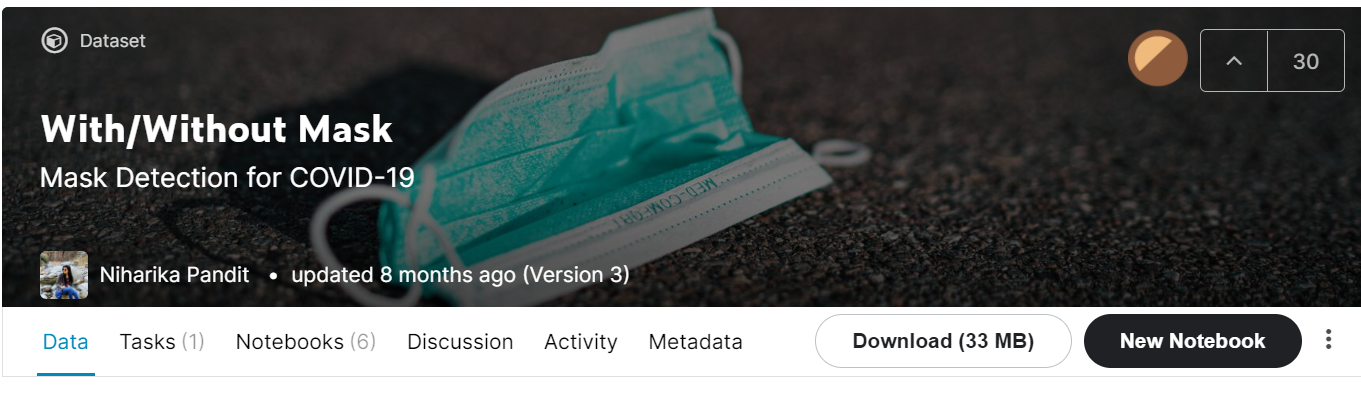

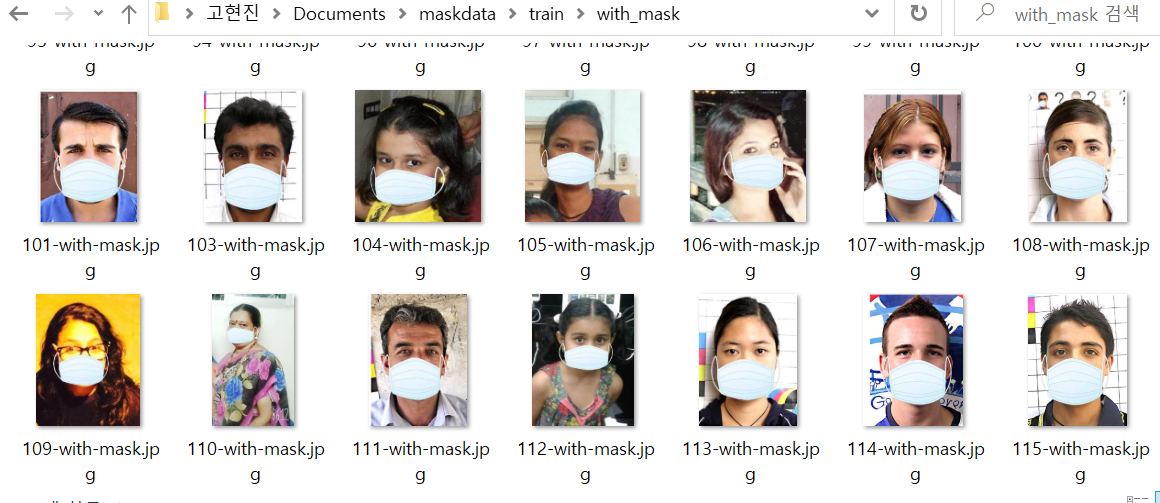

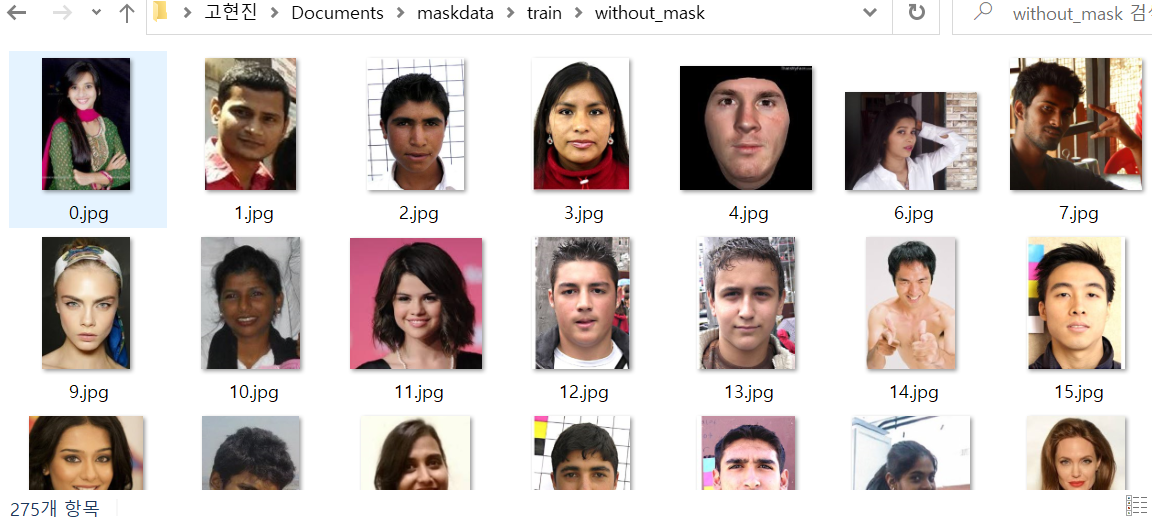

In [2]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.ImageFolder(root = r'C:\Users\kozzi\Documents\maskdata\train', transform = transform)
testset = torchvision.datasets.ImageFolder(root = r'C:\Users\kozzi\Documents\maskdata\test', transform = transform)

In [3]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(testset, batch_size = BATCH_SIZE, shuffle = True)

# Show images

In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


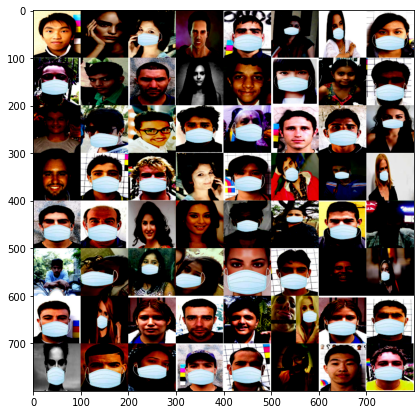

tensor([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])
With Mask:0
Without Mask:1


In [5]:
img = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()
print(labels)
print('With Mask:0\n''Without Mask:1')

# NeuralNet

In [6]:
class Net(nn.Module):
    def __init__(self, dropout_p = 0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(30000, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        self.dropout_p = dropout_p
        
    def forward(self, x):
        x = x.view(-1, 30000)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training, p = self.dropout_p)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training, p = self.dropout_p)
        x = self.fc3(x)
        return x

In [7]:
model        = Net(dropout_p=0.2).to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

# Train

In [8]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

# Evaluate

In [9]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

# Test

In [10]:
loss_array = []
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    loss_array.append(test_loss)
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5893, Accuracy: 71.21%
[2] Test Loss: 0.4716, Accuracy: 80.81%
[3] Test Loss: 0.3980, Accuracy: 84.85%
[4] Test Loss: 0.3470, Accuracy: 87.37%
[5] Test Loss: 0.3268, Accuracy: 86.87%
[6] Test Loss: 0.3109, Accuracy: 86.36%
[7] Test Loss: 0.2841, Accuracy: 88.89%
[8] Test Loss: 0.2760, Accuracy: 88.89%
[9] Test Loss: 0.2684, Accuracy: 86.87%
[10] Test Loss: 0.2505, Accuracy: 87.88%
[11] Test Loss: 0.2600, Accuracy: 87.37%
[12] Test Loss: 0.2339, Accuracy: 87.88%
[13] Test Loss: 0.2241, Accuracy: 88.89%
[14] Test Loss: 0.2310, Accuracy: 88.89%
[15] Test Loss: 0.2263, Accuracy: 87.88%
[16] Test Loss: 0.2265, Accuracy: 88.38%
[17] Test Loss: 0.2210, Accuracy: 87.88%
[18] Test Loss: 0.2030, Accuracy: 88.89%
[19] Test Loss: 0.2049, Accuracy: 90.40%
[20] Test Loss: 0.2160, Accuracy: 88.89%
[21] Test Loss: 0.1996, Accuracy: 89.90%
[22] Test Loss: 0.1979, Accuracy: 89.90%
[23] Test Loss: 0.1866, Accuracy: 90.91%
[24] Test Loss: 0.1909, Accuracy: 90.91%
[25] Test Loss: 0.1926, A

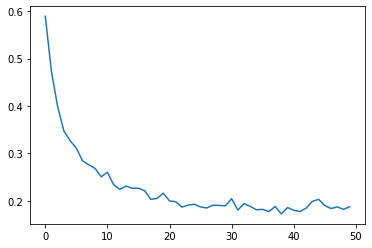

In [11]:
plt.plot(loss_array)
plt.show()